# PDE solvers

This Jupyter notebook implements several different methods that solve the differential equation 
$$\frac{\partial^2 u(x,t)}{\partial x^2} = \frac{\partial u(x,t)}{\partial t}$$
where 
$$t>0, x \in [0,L]$$
and with the initial conditions at $t=0$ as 
$$ u(x,0)=\sin(\pi x), \quad 0<x<L$$
The boundary conditions are 
$$u(0,t)=0, \quad t\geq 0 $$ 
$$u(L,t)=0, \quad t\geq 0 $$ 

The derivation of the schemes are found in the report

First off, let's import the modules. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import cm
import tensorflow as tf
import seaborn as sns
from tqdm import tqdm

/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

## Own made code for forward Euler

Then we would like to test our own code for forward euler. 

In [2]:
def explicit_scheme(dxlist, dtlist, L = 1, T = 1):
    
    for i in tqdm(range(dxlist.size)):
        dx = dxlist[i]
        dt = dtlist[i]
        C = dt/(dx**2)

        x = np.linspace(0,L,int(L/dx))
        t = np.linspace(0,T,int(T/dt))
        u_array = np.zeros((t.size,x.size))
        u = np.zeros(len(x))

        u1 = np.sin(np.pi*x) #Initial condition
        u1[0] = u1[-1] = 0.0 #Boundary conditions

        u_array[0] = u1

        for j in range(1, len(t)):
            u[1:-1] = C*(u1[2:] - 2*u1[1:-1] + u1[:-2]) + u1[1:-1]
            u[0] = u[-1] = 0.0
            u_array[j] = u
            u1 = u          #Set previous u for next time step to be current u
        
        
        sns.set()
        fig = plt.figure();
        x,t = np.meshgrid(x,t)
        ax = fig.gca(projection='3d');
        
        # Plot the surface.
        surf = ax.plot_surface(x, t, u_array, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False);
        # Customize the z axis.
        ax.set_zlim(-0.10, 1.40);
        for angle in range(0,150):
            ax.view_init(40,angle)
        ax.zaxis.set_major_locator(LinearLocator(10));
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
        plt.xlabel("x")
        plt.ylabel("t")
        plt.title("Numerical")
        plt.show()

        x_analytic = np.linspace(0,L,10000)
        analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[1][0])
        fig = plt.figure();
        plt.title("Numerical vs analytical solution for t = 0")
        plt.plot(x[0],u_array[1])
        plt.plot(x_analytic,analytic)
        plt.legend(["Numeric", "Analytic"])
        
        fig2 = plt.figure()
        ax2 = fig2.gca(projection='3d');
        # Plot the surface.
        analytic = np.sin(np.pi*x)*np.exp(-np.pi**2*t)
        surf = ax2.plot_surface(x, t, abs(analytic-u_array), cmap=cm.coolwarm,
                               linewidth=0, antialiased=False);
        # Customize the z axis.
        ax2.set_zlim(-0.10, 1.40);
        for angle in range(0,150):
            ax2.view_init(40,angle)

        ax2.zaxis.set_major_locator(LinearLocator(10));
        ax2.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
        plt.xlabel("x")
        plt.ylabel("t")
        plt.title("Absolute difference between numerical and analytical solution")
        plt.colorbar(surf)

        plt.show()

Then we can control our time- and space-grid and implement the stability criterion. 

  0%|          | 0/2 [00:00<?, ?it/s]

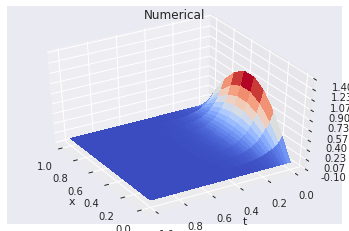

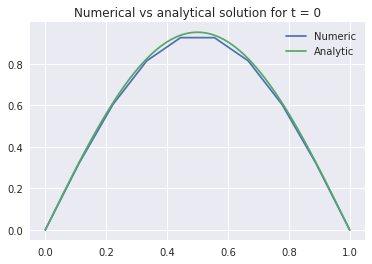

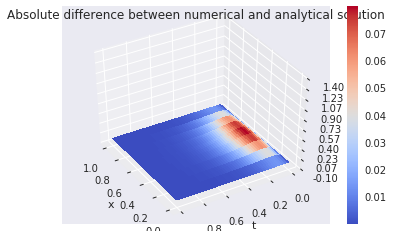

 50%|█████     | 1/2 [00:00<00:00,  1.81it/s]

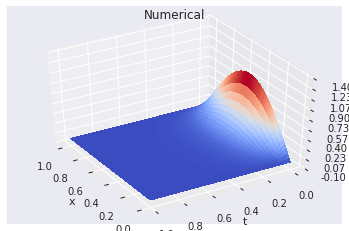

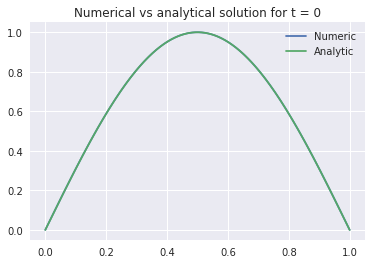

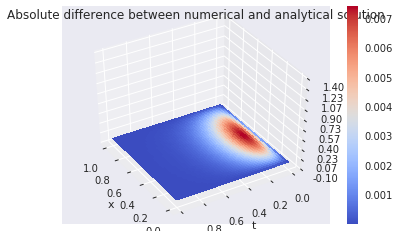

100%|██████████| 2/2 [00:11<00:00,  5.56s/it]


In [3]:
dxlist = np.array([0.1, 0.01])
dtlist = 0.5*dxlist**2 #Stability criterion
L = 1
T = 1
explicit_scheme(dxlist, dtlist)

## Different PDE-solvers

Here we have implemented different PDE-solvers. Choose the correct step length, and run the rest of the cells for optimal execution.

In [4]:
import numpy, sys, math
from  matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.pyplot import cm
import numpy as np
import os

from PDE_solvers import *

print("Which step size of Delta x do you want to run")
print("dx = 0.1: Write: '0.1' ")
print("dx = 0.01: Write: '0.01' ")

# Step length in x
dx      =   float(input())

# Number of integration points along x-axis
N       =   int(1.0/dx)

# Step length in time
dt      =   0.5*dx*dx
# Number of time steps till final time
T       =   int(1.0/dt)

L = 1
x = numpy.linspace (0,1,N+2)
t = np.linspace(0,1,T)
alpha = dt/(dx**2)

Which step size of Delta x do you want to run
dx = 0.1: Write: '0.1' 
dx = 0.01: Write: '0.01' 
0.1


### Forward Euler (again) 

In [5]:


uf = np.zeros((t.size,x.size))


#Initial codition
uf[0,:] = g(x)
uf[0,0] = uf[0,N+1] = 0.0 #Implement boundaries rigidly

forward_euler(alpha,uf,N,T)

### Backward Euler

In [6]:
ub = np.zeros((t.size,x.size))


#Initial codition
ub[0,:] = g(x)
ub[0,0] = ub[0,N+1] = 0.0 #Implement boundaries rigidly

backward_euler(alpha,ub,N,T)

### Crank-Nicholsen

In [7]:
uc = np.zeros((t.size,x.size))


#Initial codition
uc[0,:] = g(x)
uc[0,0] = uc[0,N+1] = 0.0 #Implement boundaries rigidly

crank_nicolson(alpha,uc,N,T)

### Plotting

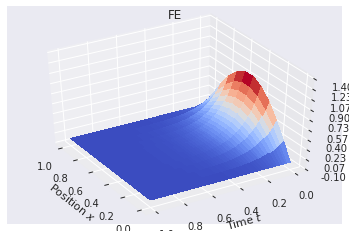

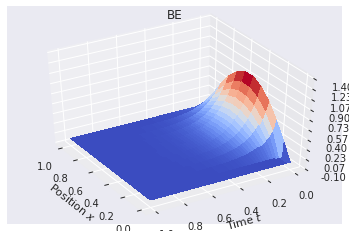

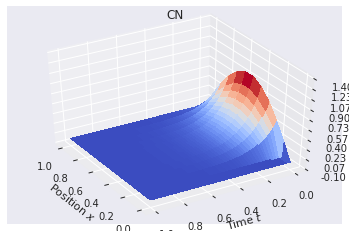

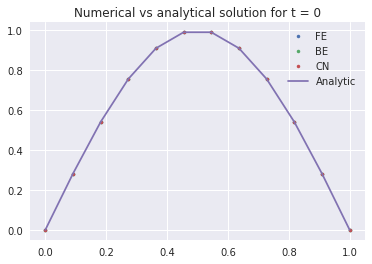


 Time = 0 


 Max difference between Forward Euler & Analytic 

1.2246467991473532e-16

 Max difference between Backward Euler & Analytic 

1.2246467991473532e-16

 Max difference between Crank-Nicolson & Analytic 

1.2246467991473532e-16


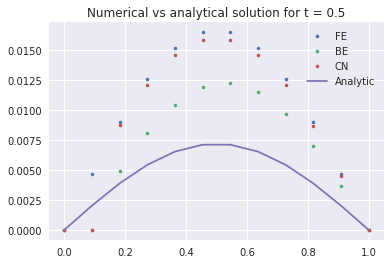


 Time = 0.5 


 Max difference between Forward Euler & Analytic 

0.009389337592439524

 Max difference between Backward Euler & Analytic 

0.005167853738198763

 Max difference between Crank-Nicolson & Analytic 

0.008748350322886457


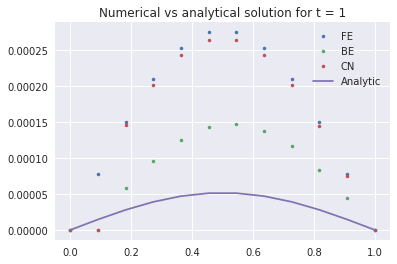


 Time = 1 


 Max difference between Forward Euler & Analytic 

0.00022412026769106388

 Max difference between Backward Euler & Analytic 

9.598687515191419e-05

 Max difference between Crank-Nicolson & Analytic 

0.00021343002710732883

 Max difference between Forward Euler & Backward Euler 

0.2703204087277988

 Max difference between Forward Euler & Crank-Nicolson 

0.2703204087277988

 Max difference between Crank-Nicolson & Backward Euler 

0.07230368399358184


In [8]:
x,t = np.meshgrid(x,t)




fig = plt.figure();
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, uf, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("FE")
plt.show()

fig = plt.figure();
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, ub, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("BE")
plt.show()

fig = plt.figure();
ax = fig.gca(projection='3d');
# Plot the surface.
surf = ax.plot_surface(x, t, uc, cmap=cm.coolwarm,
                   linewidth=0, antialiased=False);
                   # Customize the z axis.
ax.set_zlim(-0.10, 1.40);
for angle in range(0,150):
    ax.view_init(40,angle)
ax.zaxis.set_major_locator(LinearLocator(10));
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'));
plt.xlabel('Position $x$')
plt.ylabel('Time $t$')
plt.title("CN")
plt.show()

x_analytic = np.linspace(0,L, N+2)
analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[0][0])
fig = plt.figure();
plt.title("Numerical vs analytical solution for t = 0")
plt.plot(x[0], uf[0], ".")
plt.plot(x[0], ub[0], ".")
plt.plot(x[0], uc[0], ".")
plt.plot(x_analytic, analytic)
#plt.legend(["Numeric", "Analytic"])
plt.legend(["FE", "BE", "CN", "Analytic"])

plt.show()

print("\n Time = 0 \n")
print("\n Max difference between Forward Euler & Analytic \n")
print(np.max(abs(uf[0]-analytic)))

print("\n Max difference between Backward Euler & Analytic \n")
print(np.max(abs(ub[0]-analytic)))

print("\n Max difference between Crank-Nicolson & Analytic \n")
print(np.max(abs(uc[0]-analytic)))

analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[int(T/2)][0])
fig = plt.figure();
plt.title("Numerical vs analytical solution for t = 0.5")
plt.plot(x[0], uf[int(T/2)], ".")
plt.plot(x[0], ub[int(T/2)], ".")
plt.plot(x[0], uc[int(T/2)], ".")
plt.plot(x_analytic, analytic)
plt.legend(["FE", "BE", "CN", "Analytic"])
#plt.legend(["Numeric", "Analytic"])
plt.show()

print("\n Time = 0.5 \n")
print("\n Max difference between Forward Euler & Analytic \n")
print(np.max(abs(uf[int(T/2)]-analytic)))

print("\n Max difference between Backward Euler & Analytic \n")
print(np.max(abs(ub[int(T/2)]-analytic)))

print("\n Max difference between Crank-Nicolson & Analytic \n")
print(np.max(abs(uc[int(T/2)]-analytic)))

analytic = np.sin(np.pi*x_analytic)*np.exp(-np.pi**2*t[T-1][0])
fig = plt.figure();
plt.title("Numerical vs analytical solution for t = 1")
plt.plot(x[0], uf[T-1], ".")
plt.plot(x[0], ub[T-1], ".")
plt.plot(x[0], uc[T-1], ".")
plt.plot(x_analytic, analytic)
plt.legend(["FE", "BE", "CN", "Analytic"])
#plt.legend(["Numeric", "Analytic"])
plt.show()

print("\n Time = 1 \n")
print("\n Max difference between Forward Euler & Analytic \n")
print(np.max(abs(uf[T-1]-analytic)))

print("\n Max difference between Backward Euler & Analytic \n")
print(np.max(abs(ub[T-1]-analytic)))

print("\n Max difference between Crank-Nicolson & Analytic \n")
print(np.max(abs(uc[T-1]-analytic)))


print("\n Max difference between Forward Euler & Backward Euler \n")
print(np.max(abs(uf-ub)))

print("\n Max difference between Forward Euler & Crank-Nicolson \n")
print(np.max(abs(uf-uc)))

print("\n Max difference between Crank-Nicolson & Backward Euler \n")
print(np.max(abs(uc-ub)))




## Neural Network solver

/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jensbd/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: 

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


100%|██████████| 100000/100000 [01:00<00:00, 1658.81it/s]


Max absolute difference between analytical solution and TensorFlow DNN =  0.013558487092654448


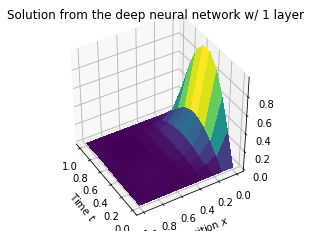

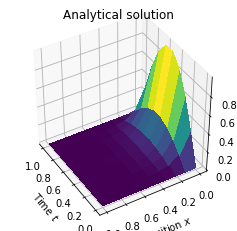

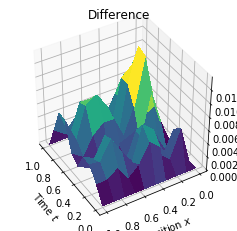

index: 0 5 9
res: [0.00000000e+00 3.42020143e-01 6.42787610e-01 8.66025404e-01
 9.84807753e-01 9.84807753e-01 8.66025404e-01 6.42787610e-01
 3.42020143e-01 1.22464680e-16] [ 0.00000000e+00 -1.35308738e-03  6.36802533e-04  2.47351373e-03
  1.35475345e-03 -1.48272279e-03 -2.76602592e-03 -1.20702637e-03
  8.92559473e-04  5.44287466e-17] [ 0.         -0.00229524 -0.00414834 -0.00422531 -0.00171022  0.0028032
  0.00668537  0.00687736  0.00328961  0.        ]


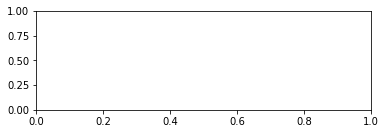

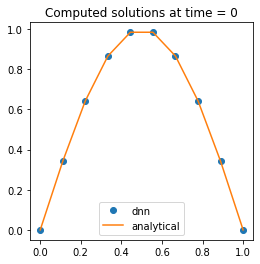

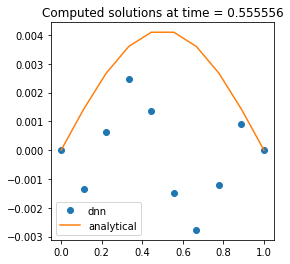

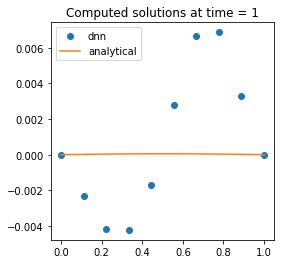

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import tqdm as tqdm

dx = 0.1
x_np = np.linspace(0,1,int(1.0/dx))

dt = 0.1
t_np = np.linspace(0,1,int(1.0/dt))

X,T = np.meshgrid(x_np, t_np)

x = X.ravel()
t = T.ravel()

## The construction phase

zeros = tf.reshape(tf.convert_to_tensor(np.zeros(x.shape)),shape=(-1,1))
x = tf.reshape(tf.convert_to_tensor(x),shape=(-1,1))
t = tf.reshape(tf.convert_to_tensor(t),shape=(-1,1))

points = tf.concat([x,t],1)

num_iter = 100000
num_hidden_neurons = [90]

X = tf.convert_to_tensor(X)
T = tf.convert_to_tensor(T)


with tf.variable_scope('dnn'):
    num_hidden_layers = np.size(num_hidden_neurons)

    previous_layer = points

    for l in range(num_hidden_layers):
        current_layer = tf.layers.dense(previous_layer, num_hidden_neurons[l],activation=tf.nn.sigmoid)
        previous_layer = current_layer

    dnn_output = tf.layers.dense(previous_layer, 1)


## Define the trial solution and cost function
def u(x):
    return tf.sin(np.pi*x)


with tf.name_scope('loss'):
    g_trial = (1 - t)*u(x) + x*(1-x)*t*dnn_output

    g_trial_dt =  tf.gradients(g_trial,t)
    g_trial_d2x = tf.gradients(tf.gradients(g_trial,x),x)

    loss = tf.losses.mean_squared_error(zeros, g_trial_dt[0] - g_trial_d2x[0])

learning_rate = 0.01
with tf.name_scope('train'):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    traning_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

g_analytic = tf.exp(-np.pi**2*t)*tf.sin(np.pi*x)
g_dnn = None

## The execution phase
with tf.Session() as sess:
    init.run()
    for i in tqdm.tqdm(range(num_iter)):
        sess.run(traning_op)

        # If one desires to see how the cost function behaves during training
        #if i % 100 == 0:
        #    print(loss.eval())

    g_analytic = g_analytic.eval()
    g_dnn = g_trial.eval()


## Compare with the analutical solution
diff = np.abs(g_analytic - g_dnn)
print('Max absolute difference between analytical solution and TensorFlow DNN = ',np.max(diff))

G_analytic = g_analytic.reshape((int(1.0/dt),int(1.0/dx)))
G_dnn = g_dnn.reshape((int(1.0/dt),int(1.0/dx)))

diff = np.abs(G_analytic - G_dnn)

# Plot the results

X,T = np.meshgrid(x_np, t_np)

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='3d')
ax.set_title('Solution from the deep neural network w/ %d layer'%len(num_hidden_neurons))
s = ax.plot_surface(X,T,G_dnn,linewidth=0,antialiased=False,cmap=cm.viridis)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Position $x$');
for angle in range(0,150):
    ax.view_init(40,angle)
#plt.colorbar(s)
plt.savefig("NN.pdf")
plt.show()
ax = fig.add_subplot(2, 1, 2, projection='3d')

fig = plt.figure(figsize=(4,4))
ax = fig.gca(projection='3d')
ax.set_title('Analytical solution')
s = ax.plot_surface(X,T,G_analytic,linewidth=0,antialiased=False,cmap=cm.viridis)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Position $x$');
for angle in range(0,150):
    ax.view_init(40,angle)
#plt.colorbar(s)
plt.savefig("Analytical.pdf")
plt.show()
fig = plt.figure(figsize=(4,4))
ax = fig.gca(projection='3d')
ax.set_title('Difference')
s = ax.plot_surface(X,T,diff,linewidth=0,antialiased=False,cmap=cm.viridis)
ax.set_xlabel('Time $t$')
ax.set_ylabel('Position $x$');
for angle in range(0,150):
    ax.view_init(40,angle)
#plt.colorbar(s)
plt.savefig("Diff.pdf")
plt.show()
# I think the plots for the 2D is wrong, maybe because of wrong slicing below
## Take some 3D slices
indx1 = 0
indx2 = int((1/dt)/2)
indx3 = int(1/dt)-1
print ('index:', indx1, indx2, indx3)
t1 = t_np[indx1]
t2 = t_np[indx2]
t3 = t_np[indx3]

# Slice the results from the DNN
res1 = G_dnn[indx1,:]
res2 = G_dnn[indx2,:]
res3 = G_dnn[indx3,:]
print ('res:', res1, res2, res3)

# Slice the analytical results
res_analytical1 = G_analytic[indx1,:]
res_analytical2 = G_analytic[indx2,:]
res_analytical3 = G_analytic[indx3,:]

# Plot the slices
ax1 = plt.subplot(212)

plt.figure(figsize=(4,4))
plt.title("Computed solutions at time = %g"%t1)
plt.plot(x_np, res1, "o")
plt.plot(x_np,res_analytical1)
plt.legend(['dnn','analytical'])
plt.savefig("NNvsAnalytic t= %.2f.pdf"%t1)

plt.figure(figsize=(4,4))
plt.title("Computed solutions at time = %g"%t2)
plt.plot(x_np, res2, "o")
plt.plot(x_np,res_analytical2)
plt.legend(['dnn','analytical'])
plt.savefig("NNvsAnalytic t= %.2f.pdf"%t2)

plt.figure(figsize=(4,4))
plt.title("Computed solutions at time = %g"%t3)
plt.plot(x_np, res3, "o")
plt.plot(x_np,res_analytical3)
plt.legend(['dnn','analytical'])
plt.savefig("NNvsAnalytic t= %.2f.pdf"%t3)

plt.show()